In [133]:
"""
Python 3.7 house_price_prediction
File name: house_price_prediction.ipynb

Version: 0.1
Author: xGino
Date: 08/09/2023
"""

'\nPython 3.7 house_price_prediction\nFile name: house_price_prediction.ipynb\n\nVersion: 0.1\nAuthor: xGino\nDate: 08/09/2023\n'

# Predicting the house prices
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of houses.

## 1. Problem definition
`How well can we predict the future sale price of houses, given it characteristics and previous examples of how much similar houses have beel sold for?`

## 2. Data
The data is dowloaded from the Kaggle House Prices - Advanced Regression Techniques: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

There are 4 main datasets:
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 3. Evaluation
The evaluation metric for this competition is the RMSE (root mean squared error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error, For example our goals for this project will be to build a machine learning moddel with minimise RMSE.

## 4. Features
Kaggle provides a data description detailing all of the features of the dataset. You can view this data description on a text editor after download: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [1]:
# Import all the tools wwe need
# Regular exploratory data analysis(EDA) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/train.csv", index_col=None)
df.shape

(1460, 81)

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
null_columns = df.isnull().sum()
columns_with_null = null_columns[null_columns > 0]

for column, count in columns_with_null.items():
    print(f"{column}, {count}")

LotFrontage, 259
Alley, 1369
MasVnrType, 8
MasVnrArea, 8
BsmtQual, 37
BsmtCond, 37
BsmtExposure, 38
BsmtFinType1, 37
BsmtFinType2, 38
Electrical, 1
FireplaceQu, 690
GarageType, 81
GarageYrBlt, 81
GarageFinish, 81
GarageQual, 81
GarageCond, 81
PoolQC, 1453
Fence, 1179
MiscFeature, 1406


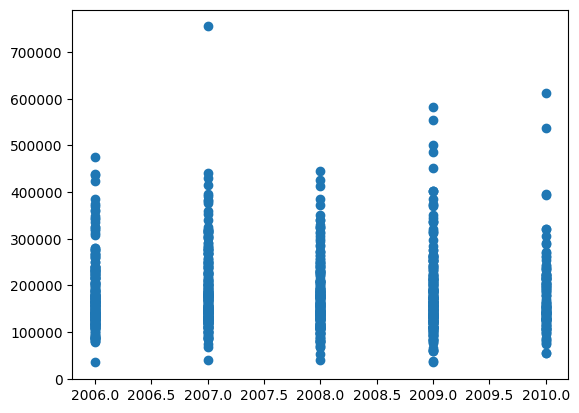

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["YrSold"][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

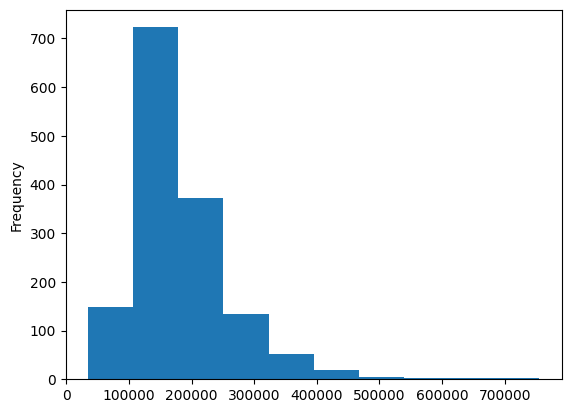

In [6]:
df.SalePrice.plot.hist()

In [7]:
df['YearRemodAdd'].head(20)

0     2003
1     1976
2     2002
3     1970
4     2000
5     1995
6     2005
7     1973
8     1950
9     1950
10    1965
11    2006
12    1962
13    2007
14    1960
15    2001
16    1970
17    1967
18    2004
19    1965
Name: YearRemodAdd, dtype: int64

In [8]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

## 5. Modeling

In [9]:
df_tmp = df.copy()

In [10]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [11]:
pd.api.types.is_string_dtype(df_tmp["Street"])

True

In [12]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [13]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [14]:
null_columns = df_tmp.isnull().sum()
columns_with_null = null_columns[null_columns > 0]

for column, count in columns_with_null.items():
    print(f"{column}, {count}")

LotFrontage, 259
Alley, 1369
MasVnrType, 8
MasVnrArea, 8
BsmtQual, 37
BsmtCond, 37
BsmtExposure, 38
BsmtFinType1, 37
BsmtFinType2, 38
Electrical, 1
FireplaceQu, 690
GarageType, 81
GarageYrBlt, 81
GarageFinish, 81
GarageQual, 81
GarageCond, 81
PoolQC, 1453
Fence, 1179
MiscFeature, 1406


In [15]:
df_tmp.Neighborhood.cat.categories

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [16]:
df_tmp.Neighborhood.cat.codes

0        5
1       24
2        5
3        6
4       15
        ..
1455     8
1456    14
1457     6
1458    12
1459     7
Length: 1460, dtype: int8

### Fill missing values

#### Filling numeric values

In [17]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [18]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


Data description from the data description.txt


* LotFrontage: Linear feet of street connected to property
* MasVnrArea: Masonry veneer area in square feet
* GarageYrBlt: Year garage was built


**Missing rows of 1460**
- LotFrontage, 259
- MasVnrArea, 8
- GarageYrBlt, 81

In [19]:
df_tmp.LotFrontage.describe(), df_tmp.LotFrontage.median()

(count    1201.000000
 mean       70.049958
 std        24.284752
 min        21.000000
 25%        59.000000
 50%        69.000000
 75%        80.000000
 max       313.000000
 Name: LotFrontage, dtype: float64,
 69.0)

In [20]:
df_tmp.MasVnrArea.describe(), df_tmp.MasVnrArea.median()

(count    1452.000000
 mean      103.685262
 std       181.066207
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%       166.000000
 max      1600.000000
 Name: MasVnrArea, dtype: float64,
 0.0)

In [21]:
df_tmp.GarageYrBlt.describe(), df_tmp.GarageYrBlt.median()

(count    1379.000000
 mean     1978.506164
 std        24.689725
 min      1900.000000
 25%      1961.000000
 50%      1980.000000
 75%      2002.000000
 max      2010.000000
 Name: GarageYrBlt, dtype: float64,
 1980.0)

In [22]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [24]:
null_columns = df_tmp.isnull().sum()
columns_with_null = null_columns[null_columns > 0]

for column, count in columns_with_null.items():
    print(f"{column}, {count}")

Alley, 1369
MasVnrType, 8
BsmtQual, 37
BsmtCond, 37
BsmtExposure, 38
BsmtFinType1, 37
BsmtFinType2, 38
Electrical, 1
FireplaceQu, 690
GarageType, 81
GarageFinish, 81
GarageQual, 81
GarageCond, 81
PoolQC, 1453
Fence, 1179
MiscFeature, 1406


In [25]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [112]:
def preprocess_data(df):
    """
    Perform transformations on df and returns transformed df.
    """
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbners
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1     # Categorical has -1 as null value

    return df

In [113]:
test_df = pd.read_csv("./data/test.csv", index_col=False)
test_df.shape

(1459, 80)

In [121]:
test_df = preprocess_data(test_df)
test_df.shape, df_tmp.shape

c:\Users\gingg\Documents\GitHub\house-price-prediction\wenv\lib\site-packages\ipykernel_launcher.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()


((1459, 136), (1460, 127))

In [115]:
df_tmp.shape

(1460, 127)

In [118]:
test_df['SalePrice'] = None

In [119]:
# We can find the columns differ using sets
set(df_tmp.columns) - set(test_df.columns)

set()

In [122]:
X_train, y_train = df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice
X_valid, y_valid = test_df.drop("SalePrice", axis=1), test_df["SalePrice"]

In [67]:
X = df_tmp.drop("SalePrice", axis=1)
Y = df_tmp.SalePrice

X.shape, Y.shape

((1460, 126), (1460,))

In [68]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1460, 126), (1460,), (1459, 135), (1459,))

### Build an evaluation function

In [127]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error


def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predicitons and true labels.
    """

    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    # if val get higher score, it means overfitting

    scores = {
              "Train RMSE": mean_squared_error(y_train, train_preds),
              "Valid RMSE": mean_squared_error(y_valid, val_preds),
              }
    return scores

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=100)

In [129]:
X_train.shape, y_valid.shape

((1460, 126), (1459,))

In [130]:
%%time
model.fit(X_train, y_train)

Wall time: 263 ms


RandomForestRegressor(max_samples=100, n_jobs=-1, random_state=42)

In [132]:
train_preds = model.predict(X_train)

mean_squared_error(y_train, train_preds)


1026539477.3935195

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            "max_features": [0.5, 1, "sqrt", "auto"],
            "max_samples": [420],
        }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42,),
                                        param_distributions=rf_grid,
                                        n_iter=100,
                                        cv=5,
                                        verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

In [ ]:
show_score(rs_model)

## Train a model wwith the best hyperparameters

In [ ]:
ideal_model = RandomForestRegressor(n_estimators=50, 
                                    min_samples_leaf=3,
                                    min_samples_split=6,
                                    max_features='auto',
                                    n_jobs=-1,
                                    max_samples=None, # all the data
                                    random_state=42)

ideal_model.fit(X_train, y_train)

In [ ]:
# Scores for ideal_model (trained on all the data)
show_score(ideal_model)